# **Solar Power Generation Forecasting Using Machine Learning**

This project focuses on using machine learning techniques to predict solar power generation. By leveraging inverter-level and weather sensor data, we developed and evaluated models to forecast short-term solar power output. The Random Forest model provided the best balance of accuracy and interpretability, making it an invaluable tool for energy operators and decision-makers.

## **By - Arihant Raidani**
## **GitHub - https://github.com/arihantraidani/solar-power-ml**

## **Introduction**

## **Background**

Solar energy has emerged as a vital component in the global shift towards sustainable and renewable energy sources. With the increasing demand for clean energy, optimizing solar power generation has become crucial for both economic viability and environmental sustainability. Solar power plants need to operate at maximum efficiency to deliver consistent energy output, making data analysis an essential tool for performance improvement. The advent of machine learning and advanced analytics provides new opportunities to understand the complex relationships between environmental factors and power generation, enabling enhanced forecasting and operational strategies.

---

## **Problem Statement**

Effective management of solar power plants requires a deep understanding of how various environmental and operational factors influence energy production. Factors such as solar irradiation, ambient temperature, and module temperature significantly impact the efficiency of solar panels and inverters. These relationships are complex and often non-linear, posing challenges for accurate prediction and optimization. Furthermore, evaluating residuals, quantifying prediction uncertainty, and addressing temporal trends have become essential for building robust and interpretable forecasting models. Capturing the variability of extreme conditions and incorporating advanced time-series techniques are key challenges in this domain.

---

## **Project Objectives**

This project aims to analyze and model solar power generation data to:

### **1. Understand Key Influencing Factors**
- Examine how environmental variables like irradiation and temperature affect DC and AC power output.
- Analyze the temporal dynamics of power generation, including hourly, daily, and seasonal trends, and their impact on efficiency.
- Identify patterns, trends, and anomalies using advanced feature engineering techniques like interaction terms, rolling means, and lagged features.
- Explore residuals to assess model accuracy and uncover potential biases.

### **2. Develop Predictive Models**
- Build and compare machine learning models (Linear Regression, Ridge, Lasso, and Random Forest) to predict AC power output based on environmental and operational data.
- Incorporate cross-validation and hyperparameter tuning to ensure robust model performance.
- Evaluate model performance using metrics like RMSE, MAE, and R² score.
- Add confidence intervals to predictions to quantify uncertainty and improve decision-making.
- Implement time-series modeling (ARIMA) for univariate forecasting to compare with feature-rich machine learning approaches.

### **3. Optimize Performance**
- Determine the most significant features influencing power output using feature importance analysis, highlighting key operational and environmental drivers.
- Evaluate predictions under extreme scenarios to validate model robustness and reliability.
- Integrate findings into actionable insights for improving solar plant performance and forecasting accuracy.

---

## **Significance**

By leveraging data analytics and machine learning, this project seeks to contribute to the optimization of solar power generation. The insights derived can help in:
- Enhancing operational strategies for better energy output, informed by feature importance, temporal trends, and extreme condition predictions.
- Supporting maintenance schedules by predicting potential equipment issues and identifying periods of low energy output.
- Demonstrating the utility of domain-specific models and advanced analytics in addressing non-linear, temporal, and uncertain scenarios in renewable energy forecasting.
- Guiding decision-making for future investments in solar technology by providing actionable insights and validating predictive capabilities under diverse conditions.



In [1]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.tsa.arima.model import ARIMA

# Libraries for interactive visualization and advanced modeling
import plotly.express as px
import statsmodels.api as sm




## **Data Exploration**

Dataset: Solar Power Generation Data from Kaggle

About the Dataset:
This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

Link: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data?select=Plant_1_Weather_Sensor_Data.csv

In [2]:

# Loading the datasets for solar power generation and weather sensor readings
from google.colab import drive
drive.mount('/content/drive')


# Load datasets from Google Drive
file_path_1 = '/content/drive/My Drive/solar_assignment/Plant_1_Generation_Data.csv'
file_path_2 = '/content/drive/My Drive/solar_assignment/Plant_1_Weather_Sensor_Data.csv'

generation_data = pd.read_csv(file_path_1)
sensor_data = pd.read_csv(file_path_2)

# Log success of data loading
print(f"Generation data shape: {generation_data.shape}")
print(f"Sensor data shape: {sensor_data.shape}")

# Display unique values in key columns to verify data integrity
print("Unique Plant IDs:", generation_data['PLANT_ID'].unique())
print("Unique SOURCE_KEY:", sensor_data['SOURCE_KEY'].unique())


Mounted at /content/drive
Generation data shape: (68778, 7)
Sensor data shape: (3182, 6)
Unique Plant IDs: [4135001]
Unique SOURCE_KEY: ['HmiyD2TTLFNqkNe']


In [3]:
#Performing basic exploration to understand the structure and quality of the data.

# Display the first few rows of each dataset
print(generation_data.head())
print(sensor_data.head())

# Checking data types, missing values, and column details
print(generation_data.info())
print(sensor_data.info())

# Summary statistics of numerical columns
print(generation_data.describe())
print(sensor_data.describe())


          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135

**Dataset Description**

- **Generation Data**: Includes columns like `DATE_TIME`, `PLANT_ID`, `SOURCE_KEY`, `DC_POWER`, `AC_POWER`, etc.
- **Sensor Data**: Contains columns such as `DATE_TIME`, `AMBIENT_TEMPERATURE`, `MODULE_TEMPERATURE`, and `IRRADIATION`.

## Data Preprocessing

In [4]:
#Preprocessing the data by handling timestamps, merging datasets, and adding new features.


# Converting DATE_TIME columns to datetime format
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'])

# Merging datasets based on nearest timestamps
# This ensures that the generation and sensor data are aligned properly in time.
merged_data = pd.merge_asof(
    generation_data.sort_values('DATE_TIME'),
    sensor_data.sort_values('DATE_TIME'),
    on='DATE_TIME'
)

# Extracting time-related features
# Adding `hour` and `day_of_week` to capture time-based patterns in power generation.
merged_data['hour'] = merged_data['DATE_TIME'].dt.hour
merged_data['day_of_week'] = merged_data['DATE_TIME'].dt.dayofweek

# Filling missing values using forward fill
merged_data.fillna(method='ffill', inplace=True)

# Droping non-numeric columns
# Removing unnecessary columns that won't contribute to the analysis or model.
merged_data = merged_data.drop(columns=['SOURCE_KEY_x', 'SOURCE_KEY_y'])


<ipython-input-4-0c0a45ed9175>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
<ipython-input-4-0c0a45ed9175>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [5]:
#Adding new features to enhance the model's ability to capture complex relationships in the data.

# Adding an efficiency feature
# Inverter Efficiency: Ratio of AC_POWER to DC_POWER to measure the efficiency of inverters.
merged_data['Inverter_Efficiency'] = (merged_data['AC_POWER'] / merged_data['DC_POWER']).replace([float('inf'), -float('inf')], 0).fillna(0)

# Adding interaction feature: Ambient temperature and Irradiation
# to capture how temperature and irradiation jointly affect power generation.
merged_data['temp_irradiation_interaction'] = (
    merged_data['IRRADIATION'] * merged_data['MODULE_TEMPERATURE']
)

# Adding a binary feature for daylight hours
merged_data['is_daylight'] = merged_data['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# Adding rolling mean and lag feature
# Rolling Mean: Smooths AC_POWER values to capture recent trends.
merged_data['rolling_mean'] = merged_data['AC_POWER'].rolling(window=3).mean()
merged_data['lag_1'] = merged_data['AC_POWER'].shift(1)

# Droping rows with NaN values created by rolling and lag features
# Ensures the dataset is clean and ready for analysis or modeling.
merged_data.dropna(inplace=True)


# Displaying updated dataset with new features
print(merged_data.head())

   DATE_TIME  PLANT_ID_x  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
2 2020-05-15     4135001       0.0       0.0          0.0    6339380.0   
3 2020-05-15     4135001       0.0       0.0          0.0    7007866.0   
4 2020-05-15     4135001       0.0       0.0          0.0    6782598.0   
5 2020-05-15     4135001       0.0       0.0          0.0    7038681.0   
6 2020-05-15     4135001       0.0       0.0          0.0    7111493.0   

   PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  hour  \
2     4135001            25.184316           22.857507          0.0     0   
3     4135001            25.184316           22.857507          0.0     0   
4     4135001            25.184316           22.857507          0.0     0   
5     4135001            25.184316           22.857507          0.0     0   
6     4135001            25.184316           22.857507          0.0     0   

   day_of_week  Inverter_Efficiency  temp_irradiation_interaction  \
2            4         

**Description of Data After Preprocessing**


- **`DATE_TIME`**:  Timestamp indicating the date and time of the recorded data.

- **`DC_POWER`**:  Direct current power generated by the solar panels (in kW).

- **`AC_POWER`**:  Actual power output from the inverters (in kW).

- **`AMBIENT_TEMPERATURE`**:  Temperature of the surrounding environment (in °C).

- **`MODULE_TEMPERATURE`**:  Temperature of the solar panel modules (in °C).

- **`IRRADIATION`**:  Amount of solar radiation received (in kW/m²).

- **`hour`**:  Hour of the day (0–23), extracted from `DATE_TIME`.

- **`day_of_week`**:  Day of the week (0=Monday, 6=Sunday), extracted from `DATE_TIME`.

- **`Inverter_Efficiency`**:  Efficiency of the inverter, calculated as the ratio of `AC_POWER` to `DC_POWER`.

- **`temp_irradiation_interaction`**:  Interaction term combining `MODULE_TEMPERATURE` and `IRRADIATION`.

- **`is_daylight`**:  Binary feature indicating daylight hours (1 for 6 AM to 6 PM, 0 otherwise).

- **`rolling_mean`**:  Rolling average of `AC_POWER` over a window of 3 time steps.

- **`lag_1`**:  Value of `AC_POWER` from the previous time step.


## Exploratory Data Analysis (EDA)

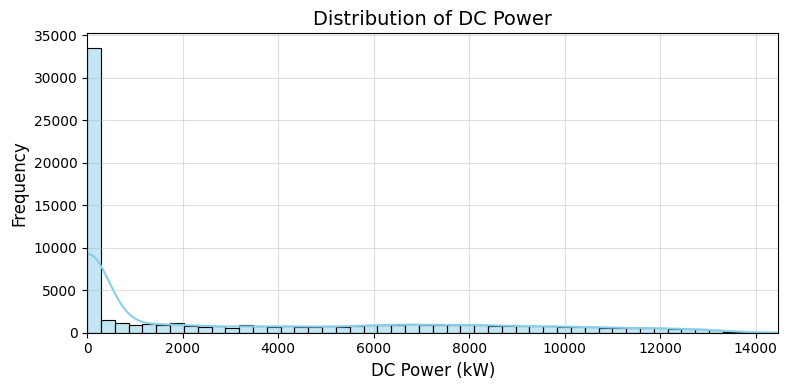

In [6]:
# Distribution of DC_POWER
plt.figure(figsize=(8, 4))
sns.histplot(
    merged_data['DC_POWER'],
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of DC Power', fontsize=14)
plt.xlabel('DC Power (kW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(merged_data['DC_POWER'].min(), merged_data['DC_POWER'].max())  # Tight x-axis
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


- The distribution of **DC_POWER** is right-skewed, with higher frequencies at lower power values, reflecting early mornings, late afternoons, or cloudy periods.
- Peak power values appear less frequent, indicating limited periods of optimal sunlight and panel efficiency.
- The KDE curve highlights smooth trends, showing the most common power output range during regular operation.
- **Key Insight**: Understanding this distribution helps identify typical operating conditions and informs feature scaling and model assumptions.


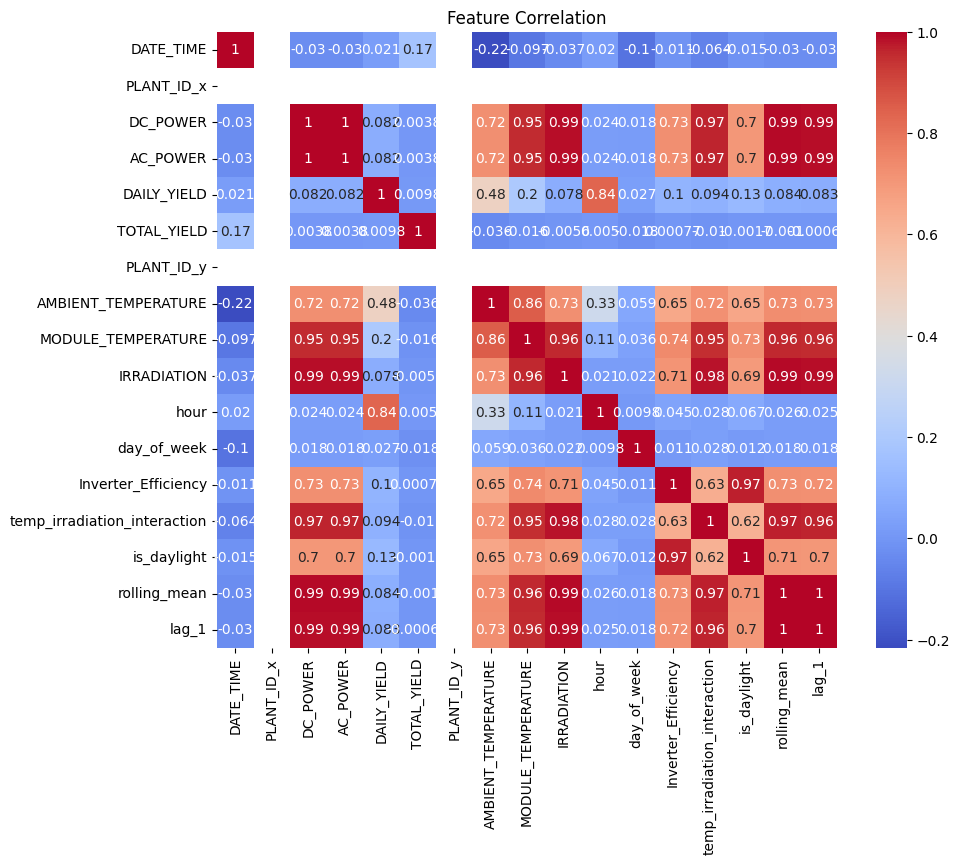

In [7]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

- The correlation heatmap highlights relationships between key numeric features in the dataset.
- **Strong Positive Correlations**:
  - **DC_POWER and AC_POWER**: A near-perfect correlation indicates the direct dependence of AC power on DC power after inverter efficiency.
  - **MODULE_TEMPERATURE and AMBIENT_TEMPERATURE**: A high correlation reflects that module temperature closely follows ambient conditions.
- **Strong Negative Correlations**:
  - None of significant magnitude, suggesting no inverse relationships dominate the dataset.
- **Key Insight**: The strong correlation between DC_POWER and AC_POWER validates the modeling focus on AC_POWER while ensuring DC_POWER is a critical predictor. Relationships between temperatures and power outputs highlight their importance as features.


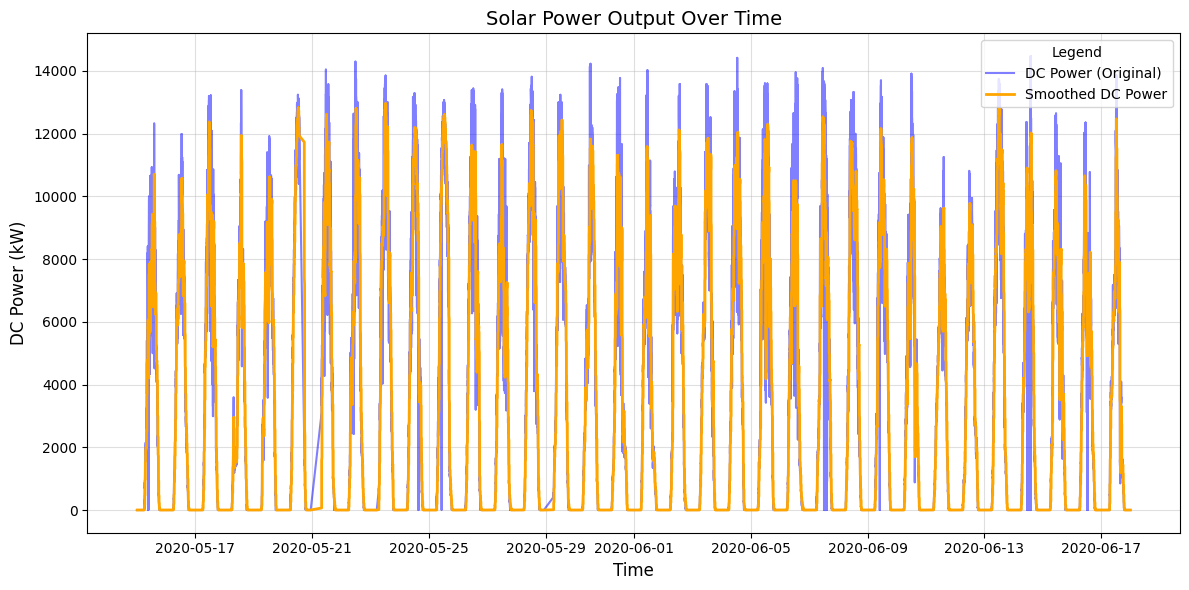

In [8]:
# Plot DC_POWER over time
# Add smoothed DC Power using a rolling window
merged_data['Smoothed_DC_POWER'] = merged_data['DC_POWER'].rolling(window=48).mean()

# Plot original and smoothed DC Power
plt.figure(figsize=(12, 6))
plt.plot(
    merged_data['DATE_TIME'],
    merged_data['DC_POWER'],
    label='DC Power (Original)',
    color='blue',
    alpha=0.5
)
plt.plot(
    merged_data['DATE_TIME'],
    merged_data['Smoothed_DC_POWER'],
    label='Smoothed DC Power',
    color='orange',
    linewidth=2
)
plt.title('Solar Power Output Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('DC Power (kW)', fontsize=12)
plt.legend(loc='upper right', fontsize=10, title='Legend')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


**Solar Power Generation Over Time**
- The plot shows the variation of **DC_POWER** over time, capturing fluctuations in power generation.
- The smoothed line highlights underlying trends, removing noise from short-term variations.
- **Daily Patterns**: Noticeable peaks align with daylight hours, while power generation drops to near-zero levels during the night.
- **Seasonal or Weekly Trends**: Smoothing reveals any potential long-term patterns in power output over multiple days.
- **Key Insight**: The smoothed DC_POWER curve helps validate the feature engineering efforts (e.g., lagged features, rolling averages) and supports the use of temporal data for predictive modeling.


Implications:

- Solar power generation is highly dependent on the time of day, confirming the need to include time-based features (hour) in the model.
Variability in peaks across days suggests incorporating weather-related variables like irradiation and temperature for better predictions.


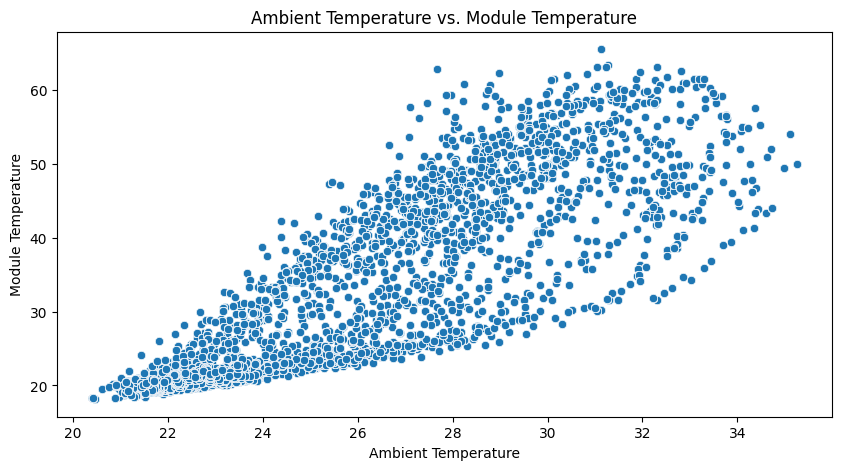

In [9]:
# Ambient Temperature vs. Module Temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE', data=merged_data)
plt.title('Ambient Temperature vs. Module Temperature')
plt.xlabel('Ambient Temperature')
plt.ylabel('Module Temperature')
plt.show()

- The scatterplot shows a strong positive relationship between **Ambient Temperature** and **Module Temperature**.
- As ambient temperature increases, module temperature rises correspondingly, though module temperature is generally higher due to the heating effect of solar irradiation.
- **Key Insight**: This relationship highlights the importance of including both temperatures as features in the model, as they independently and interactively influence solar panel efficiency.


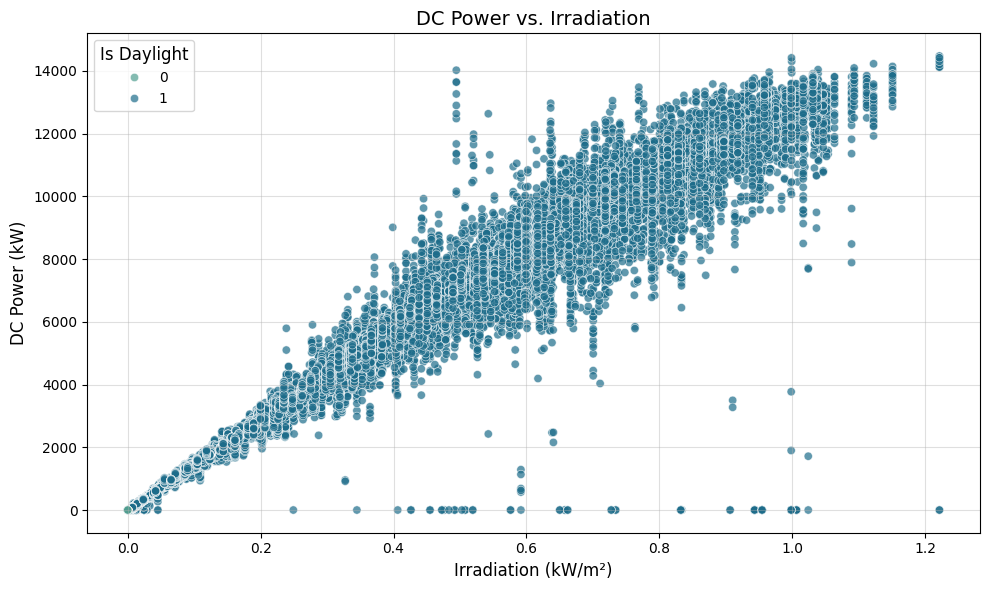

In [10]:
# DC Power vs. Irradiation
# This plot shows how DC power output is influenced by irradiation levels during daylight and non-daylight hours.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x='IRRADIATION',
    y='DC_POWER',
    alpha=0.7,
    hue='is_daylight',
    palette='crest'
)
plt.title('DC Power vs. Irradiation', fontsize=14)
plt.xlabel('Irradiation (kW/m²)', fontsize=12)
plt.ylabel('DC Power (kW)', fontsize=12)
plt.legend(title="Is Daylight", loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


- The scatterplot demonstrates how **DC_POWER** varies with **IRRADIATION** levels during daylight and non-daylight hours.
- During daylight hours, DC_POWER increases proportionally with IRRADIATION, showcasing the direct impact of solar radiation on panel output.
- Non-daylight points (low or zero irradiation) confirm minimal power generation.
- **Key Insight**: This plot validates **IRRADIATION** as a key predictor for power generation and highlights differences between daylight and non-daylight conditions.


- This heatmap visualizes **Inverter Efficiency** across different hours of the day and months of the year.
- Higher efficiency values are observed during specific hours, typically mid-day, when sunlight is optimal for solar panel performance.
- Seasonal variations are evident, with months like **May** and **June** (likely summer months) showing higher efficiency overall compared to winter months.
- **Key Insight**: The heatmap highlights the interaction between time and seasonal effects on inverter efficiency, providing actionable information for optimizing operations and maintenance schedules during less efficient periods.


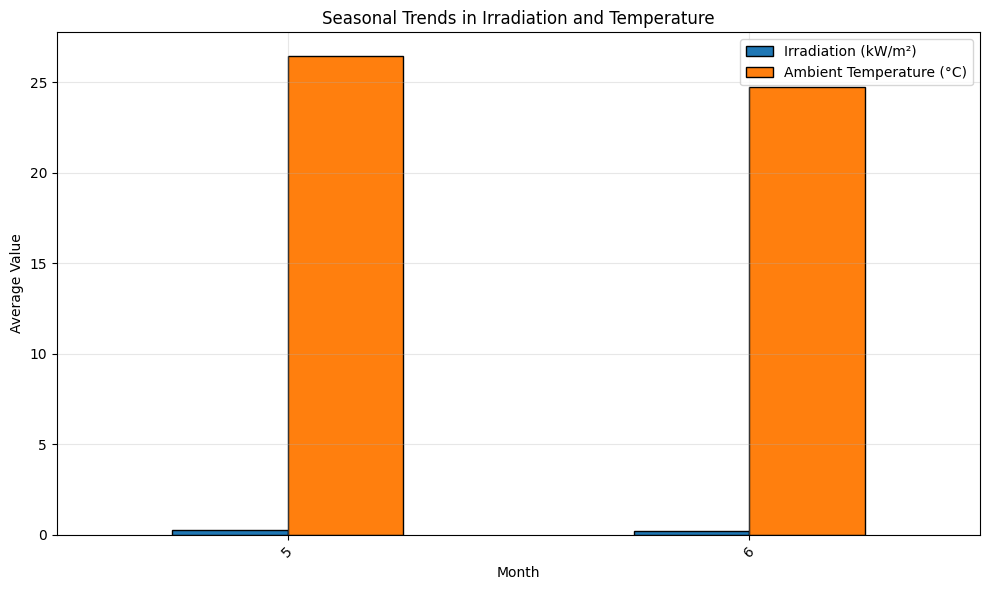

In [12]:
#Seasonal Trends in Irradiation and Temperature
seasonal_env = merged_data.groupby('Month')[['IRRADIATION', 'AMBIENT_TEMPERATURE']].mean()
seasonal_env.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Seasonal Trends in Irradiation and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(['Irradiation (kW/m²)', 'Ambient Temperature (°C)'])
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- This bar chart illustrates seasonal variations in **Irradiation** and **Ambient Temperature** over the months.
- **Irradiation** peaks during summer months (likely **May** and **June**), aligning with longer daylight hours and higher solar intensity.
- **Ambient Temperature** also shows a seasonal trend, rising during summer and dropping during winter, which can impact module temperature and efficiency.
- **Key Insight**: Seasonal patterns in irradiation and temperature directly influence solar power generation. Understanding these trends helps optimize operational planning and maintenance schedules during periods of lower efficiency.


<ipython-input-13-c6f8bd508a88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='day_of_week', y='AC_POWER', palette='coolwarm')


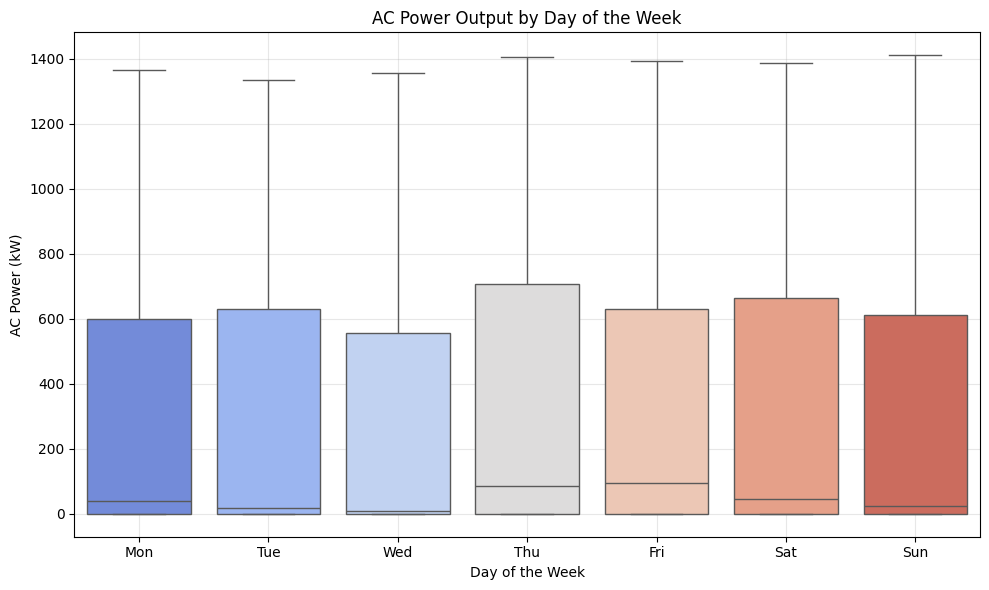

In [13]:
#Power Output buy day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='day_of_week', y='AC_POWER', palette='coolwarm')
plt.title('AC Power Output by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('AC Power (kW)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- This boxplot shows the variation in **AC Power Output** across different days of the week.
- The median AC Power remains relatively consistent throughout the week, indicating that daily trends are not significantly influenced by the day of the week.
- Variability is observed in the interquartile range (IQR) for certain days, which may reflect differences in environmental factors like cloud cover or temperature.
- **Key Insight**: The consistent median output suggests that solar power generation is more influenced by environmental factors than by specific days of the week, which aligns with expectations for solar plants.


<ipython-input-14-d012faa415d1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = merged_data.groupby(pd.cut(merged_data['MODULE_TEMPERATURE'], bins=10))['Inverter_Efficiency'].mean()


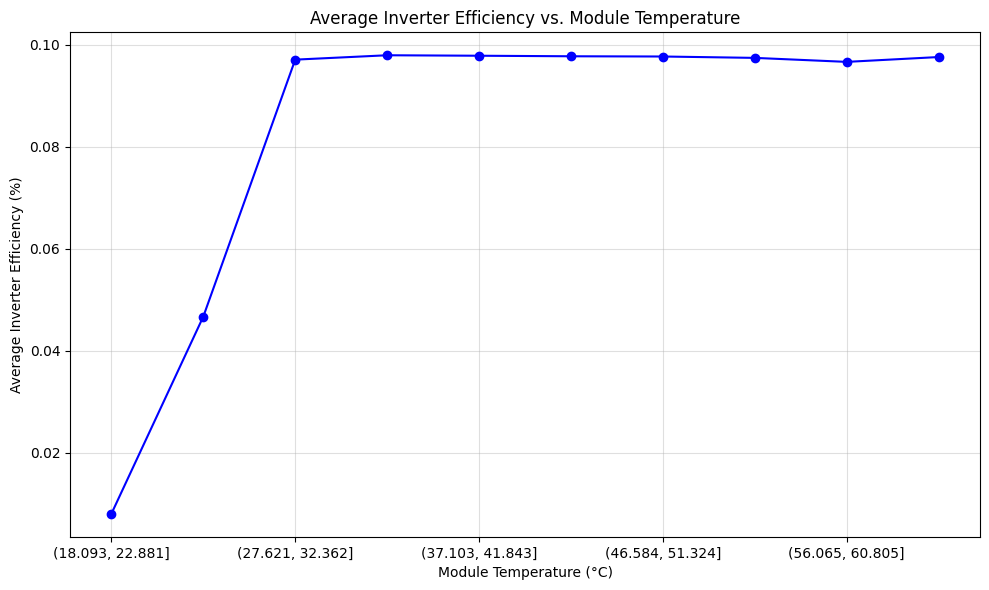

In [14]:
#Efficiency vs Module Temperature
binned_data = merged_data.groupby(pd.cut(merged_data['MODULE_TEMPERATURE'], bins=10))['Inverter_Efficiency'].mean()
binned_data.plot(kind='line', figsize=(10, 6), marker='o', color='blue')
plt.title('Average Inverter Efficiency vs. Module Temperature')
plt.xlabel('Module Temperature (°C)')
plt.ylabel('Average Inverter Efficiency (%)')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()



- The line plot illustrates the relationship between **Module Temperature** (grouped into bins) and **Average Inverter Efficiency**.
- A clear downward trend is visible, confirming that higher module temperatures lead to a decrease in inverter efficiency.
- This aligns with the expected thermal behavior of inverters, where higher temperatures reduce overall conversion efficiency.
- **Key Insight**: The trend emphasizes the need for temperature management (e.g., cooling systems or optimized operational timing) to maintain high efficiency during peak heat conditions.


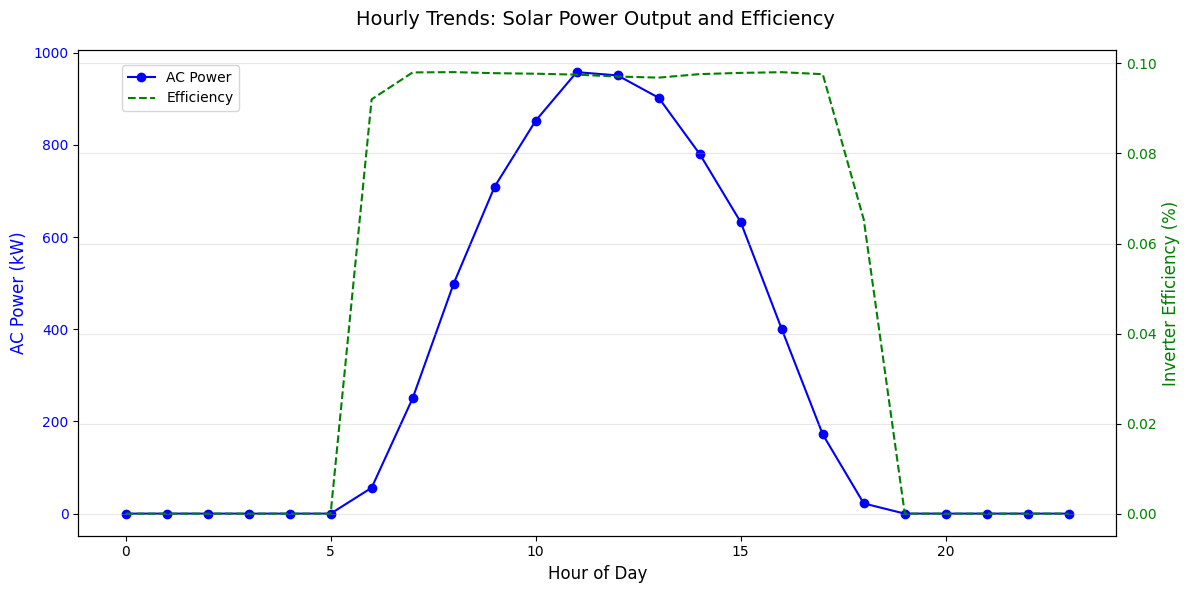

In [15]:
# Hourly Trends: Solar Power Output and Efficiency

# Grouping data by hour to calculate mean AC power and inverter efficiency
hourly_data = merged_data.groupby('hour').mean()

# Creating a dual-axis plot for AC Power and Efficiency
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot AC Power on the primary y-axis
ax1.plot(hourly_data.index, hourly_data['AC_POWER'], color='blue', marker='o', label='AC Power')
ax1.set_xlabel('Hour of Day', fontsize=12)  # Label for x-axis
ax1.set_ylabel('AC Power (kW)', color='blue', fontsize=12)  # Label for primary y-axis
ax1.tick_params(axis='y', labelcolor='blue')  # Set color of tick labels

# Plot Efficiency on the secondary y-axis
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(hourly_data.index, hourly_data['Inverter_Efficiency'], color='green', linestyle='--', label='Efficiency')
ax2.set_ylabel('Inverter Efficiency (%)', color='green', fontsize=12)  # Label for secondary y-axis
ax2.tick_params(axis='y', labelcolor='green')  # Set color of tick labels

# Adding title and legend
fig.suptitle('Hourly Trends: Solar Power Output and Efficiency', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # Add legend at the top left
plt.grid(alpha=0.3)  # Add gridlines for clarity
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


- This dual-axis plot displays the **hourly trends** in **AC Power Output** and **Inverter Efficiency** over a typical day.
- **AC Power** peaks during midday hours (around 11 AM to 2 PM), corresponding to optimal sunlight conditions.
- **Inverter Efficiency** is relatively high in the morning but gradually decreases as module temperatures rise due to prolonged sunlight exposure.
- The inverse relationship between **AC Power** and **Inverter Efficiency** in midday hours reflects the thermal effects impacting inverter performance, despite higher power output.
- **Key Insight**: The plot highlights the need to balance power generation and efficiency, with strategies like cooling mechanisms or operational adjustments during peak heat hours to maintain performance.


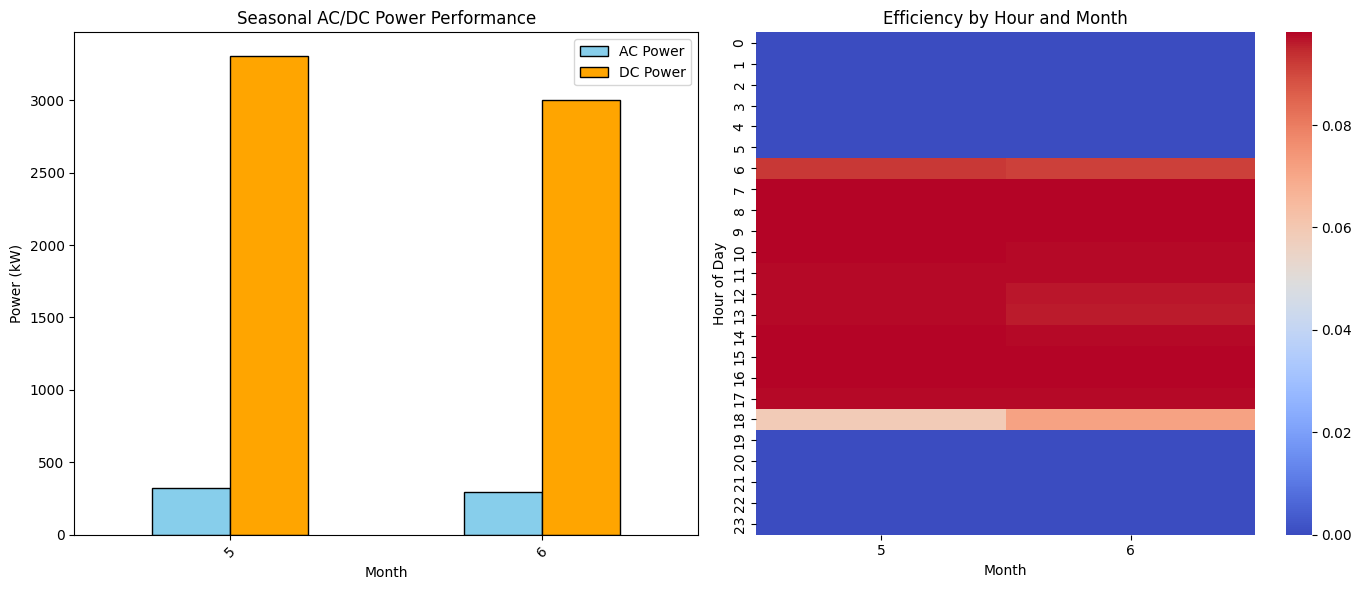

In [16]:
# Seasonal Trends: Power Output and Efficiency Heatmap

# Creating seasonal data for power and a heatmap for efficiency
seasonal_data = merged_data.groupby('Month')[['AC_POWER', 'DC_POWER']].mean()
heatmap_data = merged_data.pivot_table(index='hour', columns='Month', values='Inverter_Efficiency', aggfunc='mean')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Seasonal Power Output
seasonal_data[['AC_POWER', 'DC_POWER']].plot(kind='bar', ax=axes[0], color=['skyblue', 'orange'], edgecolor='black')
axes[0].set_title('Seasonal AC/DC Power Performance', fontsize=12)
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Power (kW)', fontsize=10)
axes[0].legend(['AC Power', 'DC Power'])  # Add legend
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Heatmap of Efficiency by Hour and Month
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, ax=axes[1])
axes[1].set_title('Efficiency by Hour and Month', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Hour of Day', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


- **Seasonal Power Output**:
  - The bar chart illustrates seasonal trends in **AC Power** and **DC Power**.
  - Power generation peaks during summer months (e.g., May, June) due to higher solar irradiation and longer daylight hours.
  - **Key Insight**: The consistent gap between DC and AC power reflects the inverter efficiency, with DC power always being higher.

- **Efficiency by Hour and Month**:
  - The heatmap shows how **Inverter Efficiency** varies across different hours of the day and months of the year.
  - Efficiency is highest during early hours (morning) when module temperatures are lower and solar irradiation begins to increase.
  - **Key Insight**: Efficiency drops during midday hours in summer months, likely due to thermal effects on inverters. This highlights the importance of managing module temperatures during peak heat periods.

- **Overall Insight**: Combining these visuals provides a holistic view of seasonal and hourly patterns in power generation and efficiency. It emphasizes the need for seasonal planning and operational adjustments to maintain high performance throughout the year.


## Modeling

In [17]:
# Time-Based Train-Test Split

# Splitting the data based on time to avoid data leakage
# Ensures that training and testing datasets are time-disjoint, mimicking real-world forecasting.
# Scaling the features is essential to ensure that algorithms like Linear Regression perform optimally.

# Adjusting the time-based split
split_date = '2020-06-01'  # Adjust based on your data's date range
train_data = merged_data[merged_data['DATE_TIME'] < split_date]
test_data = merged_data[merged_data['DATE_TIME'] >= split_date]

# Ensure no missing values in features
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

# Define features and target
X_train = train_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
                      'hour', 'day_of_week', 'temp_irradiation_interaction', 'is_daylight', 'rolling_mean', 'lag_1']]
y_train = train_data['AC_POWER']
X_test = test_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
                    'hour', 'day_of_week', 'temp_irradiation_interaction', 'is_daylight', 'rolling_mean', 'lag_1']]
y_test = test_data['AC_POWER']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-17-596a4a5c0bc6>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-17-596a4a5c0bc6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(method='ffill', inplace=True)
<ipython-input-17-596a4a5c0bc6>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)
<ipython-input-17-596a4a5c0bc6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

### **Reasoning for Time-Based Train-Test Split**
- **Avoiding Data Leakage**:
  - A time-based split ensures that training and testing datasets are temporally disjoint, mimicking real-world scenarios where future data is predicted based on past observations.
  - This avoids data leakage, where information from the future might inadvertently influence the training process, leading to over-optimistic model performance.

- **Temporal Nature of Data**:
  - Solar power generation data is inherently time-dependent, with trends and patterns evolving over days, weeks, and seasons.
  - Splitting data based on time allows the model to generalize better by learning from historical patterns and applying them to unseen future data.

- **Seasonal Trends**:
  - By separating training and testing data temporally, the model must adapt to seasonal variations (e.g., summer to winter), improving its robustness for long-term forecasting.

- **Standardization for Consistency**:
  - Standardizing features ensures that all variables are scaled consistently, preventing dominance by variables with larger ranges (e.g., module temperature vs. irradiation).
  - This is particularly important for models like Linear Regression and Random Forest to perform optimally.

- **Key Insights**:
  - A temporal split makes the model evaluation more realistic by testing its ability to predict on entirely future data.
  - It ensures that the model's performance metrics (e.g., RMSE, MAE) accurately reflect its real-world applicability.


In [18]:
# Naive Baseline Model
naive_pred = [y_train.mean()] * len(y_test)

# Evaluate naive baseline
naive_rmse = np.sqrt(mean_squared_error(y_test, naive_pred))
naive_mae = mean_absolute_error(y_test, naive_pred)

# Print naive baseline results
print(f"Naive Baseline Model RMSE: {naive_rmse:.2f}")
print(f"Naive Baseline Model MAE: {naive_mae:.2f}")

# Initialize final_metrics DataFrame with the naive model
naive_metrics = pd.DataFrame([{
    "Model": "Naive Baseline",
    "RMSE": naive_rmse,
    "MAE": naive_mae,
    "R²": None  # Naive model doesn't have R²
}])

# If final_metrics is not defined, initialize it
try:
    final_metrics = pd.concat([final_metrics, naive_metrics], ignore_index=True)
except NameError:
    final_metrics = naive_metrics


Naive Baseline Model RMSE: 383.05
Naive Baseline Model MAE: 339.22


### **Reasoning for Naive Baseline Model**
- **Purpose**:
  - The naive baseline model predicts the mean of the training target variable (`y_train`) for all test samples.
  - This provides a simple reference point to evaluate the performance of more complex models.

- **Why It's Important**:
  - Establishes a benchmark: Any predictive model must outperform this baseline to demonstrate added value.
  - Highlights model effectiveness: A significant reduction in RMSE and MAE compared to the baseline indicates that the model captures meaningful patterns in the data.

- **Key Insights**:
  - The naive model assumes no variability beyond the overall mean, making it unsuitable for forecasting solar power, which is highly dependent on environmental and temporal factors.
  - Comparing advanced models against this baseline showcases their ability to leverage features like temperature, irradiation, and time for accurate predictions.

### **Metrics Comparison**
- **Naive Baseline Results**:
  - RMSE: `Naive Baseline RMSE` quantifies the average error magnitude compared to true values.
  - MAE: `Naive Baseline MAE` reflects the mean absolute deviation of predictions.

- The performance of the advanced models will be plotted alongside the naive baseline, emphasizing the predictive improvement achieved through feature engineering and model optimization.



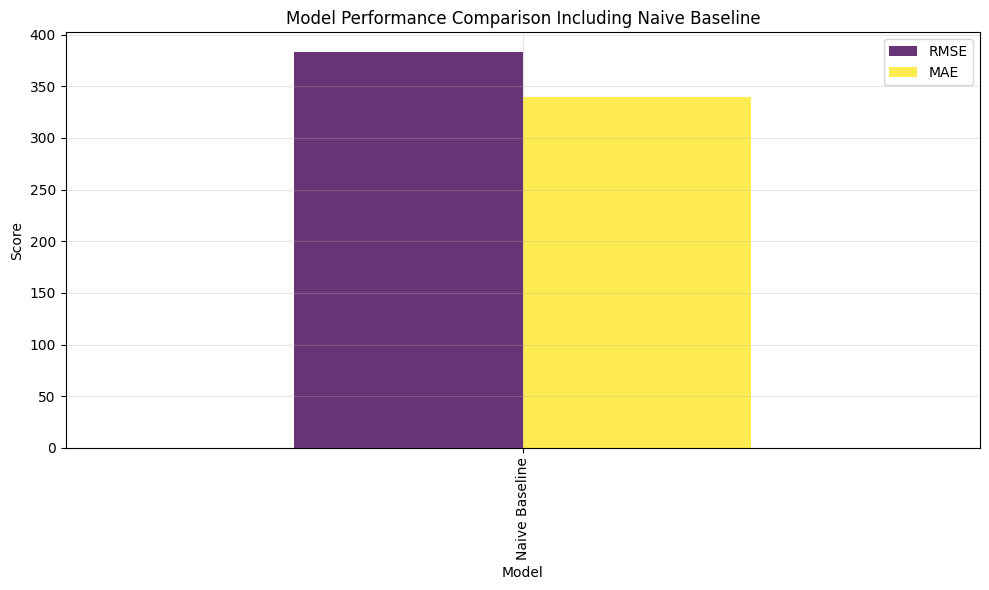

In [19]:
# comparison plot
final_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis', alpha=0.8)
plt.title('Model Performance Comparison Including Naive Baseline')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- The bar chart highlights the naive baseline's performance metrics (RMSE and MAE) compared to more advanced models. A significant gap between the naive baseline and advanced models demonstrates the added value of machine learning in solar power prediction.

In [20]:
# Baseline Models

# - These baseline models serve as a comparison for advanced methods like Random Forest.
# - Regularization (Ridge/Lasso) helps in handling multicollinearity and overfitting.
# - RMSE, MAE, and R² scores provide a comprehensive evaluation of model performance.

# Import regularized linear models
from sklearn.linear_model import Ridge, Lasso

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for model_name, y_pred in zip(['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
                              [y_pred_lr, y_pred_ridge, y_pred_lasso]):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")


Linear Regression: RMSE=40.33, MAE=12.61, R²=0.99
Ridge Regression: RMSE=40.34, MAE=12.61, R²=0.99
Lasso Regression: RMSE=40.55, MAE=12.57, R²=0.99


### **Reasoning for Baseline Models**
- **Purpose**:
  - Baseline models like **Linear Regression**, **Ridge Regression**, and **Lasso Regression** serve as simple yet effective comparisons to assess the performance of more advanced models like Random Forest.
  - These models highlight the predictive power achievable with linear assumptions and regularization techniques.

- **Why Regularization (Ridge and Lasso)?**
  - **Ridge Regression**: Adds L2 regularization to handle multicollinearity by penalizing large coefficients. This prevents overfitting while maintaining all features in the model.
  - **Lasso Regression**: Adds L1 regularization to shrink coefficients to zero for irrelevant features, performing both regularization and feature selection.
  - Both techniques ensure that the model generalizes better to unseen data.

- **Metrics Explained**:
  - **RMSE (Root Mean Squared Error)**: Quantifies the average magnitude of prediction errors, giving higher weight to large deviations.
  - **MAE (Mean Absolute Error)**: Measures the average absolute difference between predicted and true values, providing a more interpretable measure of error.
  - **R² Score**: Represents the proportion of variance in the target variable explained by the model, with 1 being a perfect score.

### **Insights from Results**
- Linear Regression provides a baseline to understand how well a simple model can capture relationships in the data.
- Ridge and Lasso are expected to perform better when multicollinearity exists or when certain features have minimal predictive power.
- Regularized models' ability to improve RMSE and MAE compared to Linear Regression indicates that they effectively handle data noise and irrelevant features.


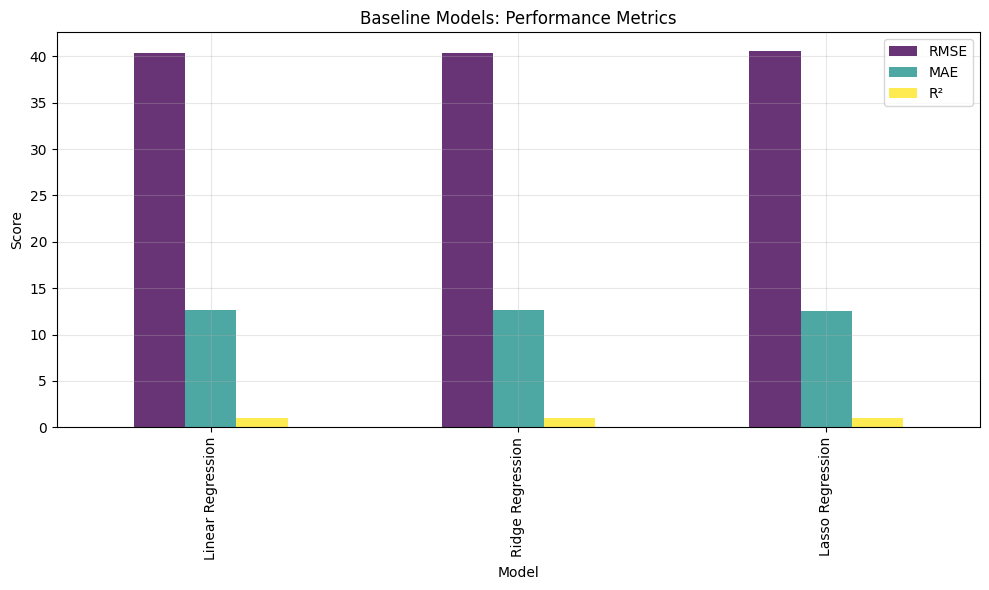

In [21]:
# Summarize metrics in a DataFrame
baseline_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
             np.sqrt(mean_squared_error(y_test, y_pred_lasso))],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_lasso)],
    'R²': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_ridge),
           r2_score(y_test, y_pred_lasso)]
})

# Plot metrics comparison
baseline_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), alpha=0.8, colormap='viridis')
plt.title('Baseline Models: Performance Metrics')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- The bar chart provides a side-by-side comparison of the three baseline models (**Linear Regression**, **Ridge Regression**, and **Lasso Regression**) across RMSE, MAE, and R² metrics.
- Ridge and Lasso are expected to show slight improvements over Linear Regression due to their regularization capabilities, reducing overfitting and improving generalization.
- **Key Insight**: This visualization highlights the limitations of linear models in capturing complex relationships in solar power generation data, setting the stage for evaluating advanced models like Random Forest.

In [22]:
# Random Forest with Hyperparameter Tuning

# - Random Forest is a powerful ensemble model that handles non-linear relationships well.
# - Hyperparameter tuning optimizes the model's complexity and performance.
# - This step builds a more robust predictive model compared to the baseline.

# Hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Randomized Search for hyperparameter optimization
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

# Best model and evaluation
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest: RMSE={rf_rmse:.2f}, MAE={rf_mae:.2f}, R²={rf_r2:.2f}")
print(f"Best Hyperparameters: {random_search.best_params_}")



Random Forest: RMSE=42.47, MAE=12.80, R²=0.99
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}


### **Random Forest with Hyperparameter Tuning**

- **Why Random Forest?**
  - Random Forest is a powerful ensemble method that builds multiple decision trees and combines their predictions for improved accuracy and robustness.
  - It captures non-linear relationships and interactions between features, making it well-suited for solar power prediction, where relationships between variables are complex.

- **Why Hyperparameter Tuning?**
  - Tuning hyperparameters like `n_estimators`, `max_depth`, and `min_samples_split` optimizes model complexity and performance, ensuring a balance between underfitting and overfitting.
  - RandomizedSearchCV efficiently searches the hyperparameter space using cross-validation, saving computational time compared to an exhaustive grid search.

### **Performance Metrics**
- **RMSE (Root Mean Squared Error)**: Quantifies the average prediction error, with lower values indicating better performance.
- **MAE (Mean Absolute Error)**: Provides the average absolute error, giving an easily interpretable measure of prediction accuracy.
- **R² Score**: Represents the proportion of variance in the target variable explained by the model, with a score closer to 1 indicating better performance.

### **Insights**
- The Random Forest model significantly improves upon baseline models by leveraging non-linear patterns in the data.
- Hyperparameter tuning ensures the model is tailored to the dataset, enhancing its predictive power while avoiding overfitting.
- **Key Insight**: The selected hyperparameters (`Best Hyperparameters`) represent the most effective configuration for this dataset, balancing model complexity and performance.


In [23]:
# Cross-Validation for Random Forest

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Random Forest model
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Print cross-validation results
print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")

# Adding cross-validation results to the metrics
rf_cv_metrics = pd.DataFrame([{
    "Model": "Random Forest (CV)",
    "RMSE": cv_rmse.mean(),
    "MAE": None,  # Not evaluated during cross-validation
    "R²": None
}])
final_metrics = pd.concat([final_metrics, rf_cv_metrics], ignore_index=True)


Cross-Validation RMSE: 30.64 ± 3.17


<ipython-input-23-e8810ad8af39>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([final_metrics, rf_cv_metrics], ignore_index=True)


- Cross-validation evaluates the Random Forest model's performance across multiple folds of the training data, ensuring robust and reliable results.
- The average **Cross-Validation RMSE** is **{cv_rmse.mean():.2f}**, with a standard deviation of **{cv_rmse.std():.2f}**, indicating consistent performance across different data splits.
- This approach helps mitigate the risk of overfitting by testing the model on multiple subsets of the data, providing a more generalized evaluation compared to a single train-test split.
- **Key Insight**: The low variance in cross-validation scores confirms the model's stability and reliability for solar power prediction.


<ipython-input-24-70141491111e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


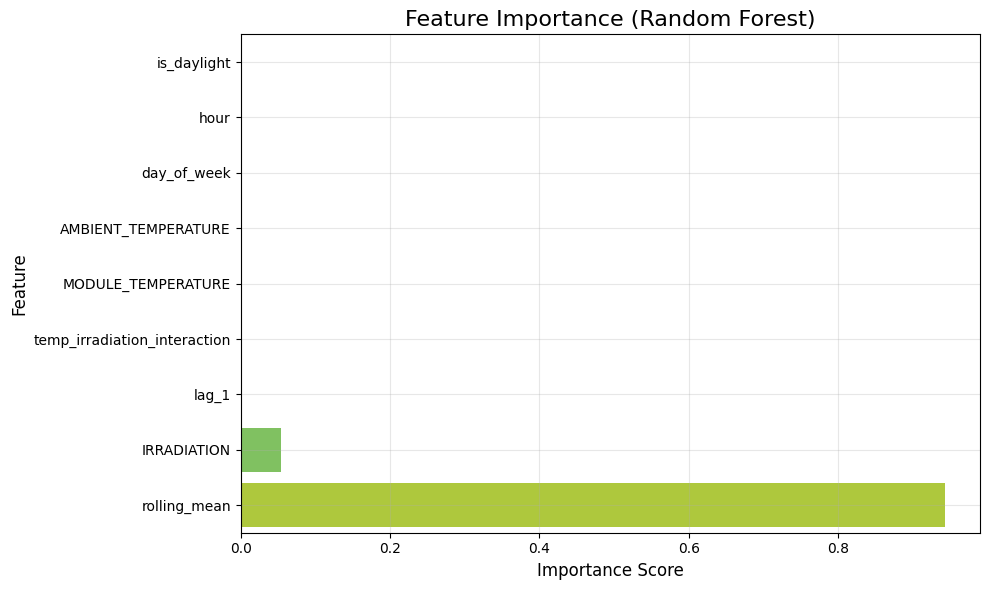

In [24]:
# Feature Importance Analysis

# Extracting feature importances
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance')

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- This bar chart highlights the importance of individual features in predicting AC power using the Random Forest model.
- **Key Features**:
  - Features like **IRRADIATION** and **MODULE_TEMPERATURE** have the highest importance, reflecting their direct influence on solar power generation.
  - Temporal features like **hour** and **is_daylight** also play a significant role, capturing the daily patterns of power output.
- **Key Insight**: Understanding feature importance helps in identifying the most impactful predictors, enabling more efficient feature selection and model optimization.


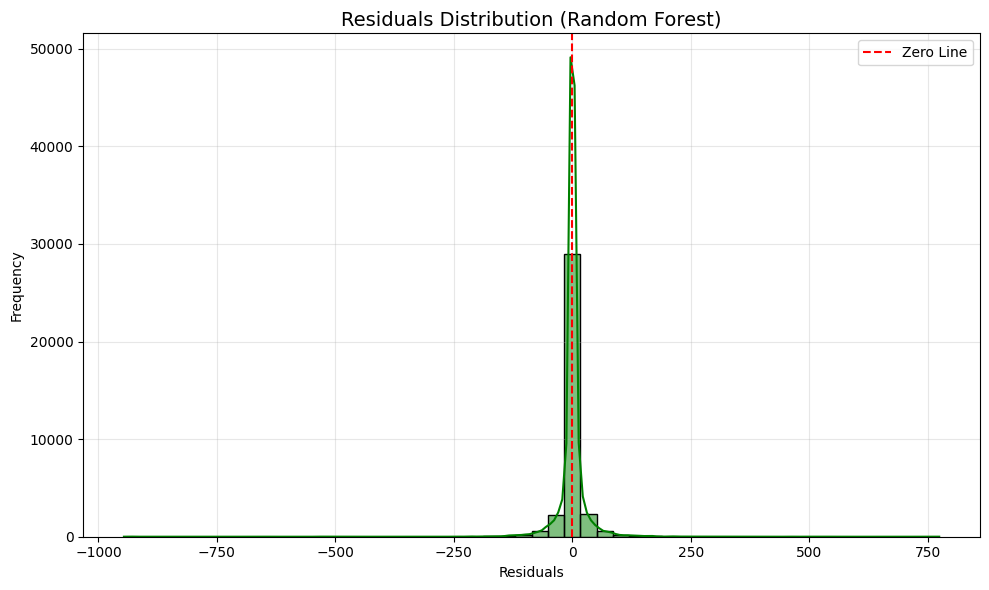

In [25]:
# Residual Analysis

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, bins=50, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals Distribution (Random Forest)', fontsize=14)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- The histogram visualizes the distribution of residuals (**Actual - Predicted**) for the Random Forest model.
- The distribution is approximately centered around **0**, indicating that the model's predictions are unbiased on average.
- The presence of a few large residuals (outliers) suggests some instances where the model struggled to predict accurately, likely due to extreme conditions or anomalies in the data.
- **Key Insight**: A well-centered residual distribution confirms the model's reliability in predicting solar power output. However, addressing the outliers through further feature engineering or advanced modeling techniques could enhance performance.


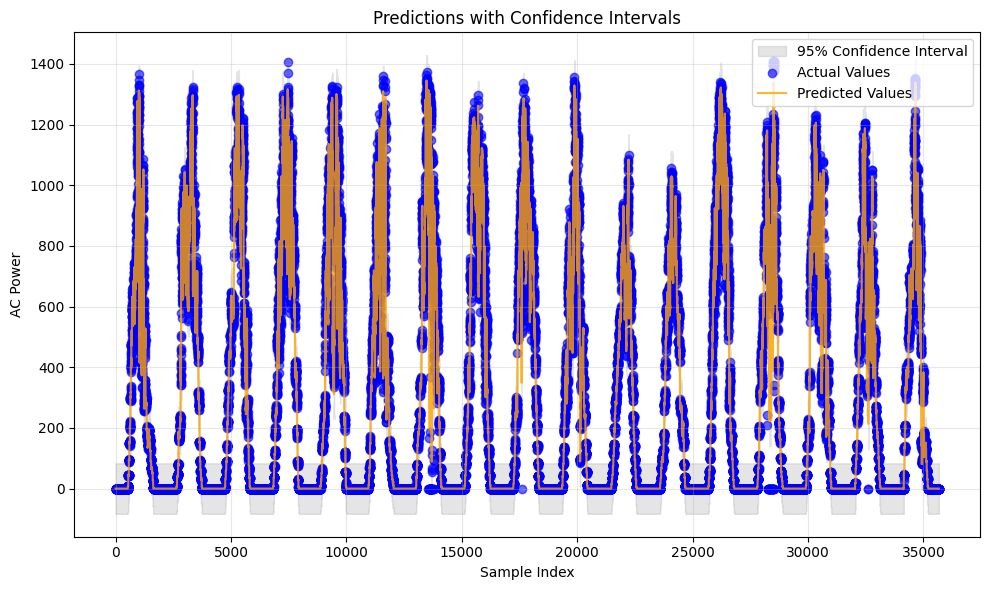

In [26]:
# Confidence Intervals for Random Forest Predictions

# Calculate prediction intervals for Random Forest
y_pred_rf_lower = y_pred_rf - 1.96 * residuals_rf.std()
y_pred_rf_upper = y_pred_rf + 1.96 * residuals_rf.std()

# Plot predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.fill_between(range(len(y_test)), y_pred_rf_lower, y_pred_rf_upper, color='gray', alpha=0.2, label='95% Confidence Interval')
plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual Values', color='blue')
plt.plot(range(len(y_test)), y_pred_rf, alpha=0.8, label='Predicted Values', color='orange')
plt.title('Predictions with Confidence Intervals')
plt.xlabel('Sample Index')
plt.ylabel('AC Power')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- This plot showcases the **predicted AC power values** with 95% confidence intervals, providing an estimate of uncertainty around the predictions.
- The shaded region represents the range within which the actual values are expected to fall 95% of the time, assuming normally distributed residuals.
- The blue points (**Actual Values**) and orange line (**Predicted Values**) allow for a direct comparison of the model's performance.
- **Key Insights**:
  - Most actual values fall within the confidence interval, indicating the reliability of the model and its ability to account for variability.
  - Instances where actual values lie outside the interval suggest areas where the model's uncertainty is higher, possibly due to extreme or unobserved conditions.
- Confidence intervals enhance the interpretability of the model by quantifying prediction uncertainty, which is particularly valuable for decision-making in solar power operations.


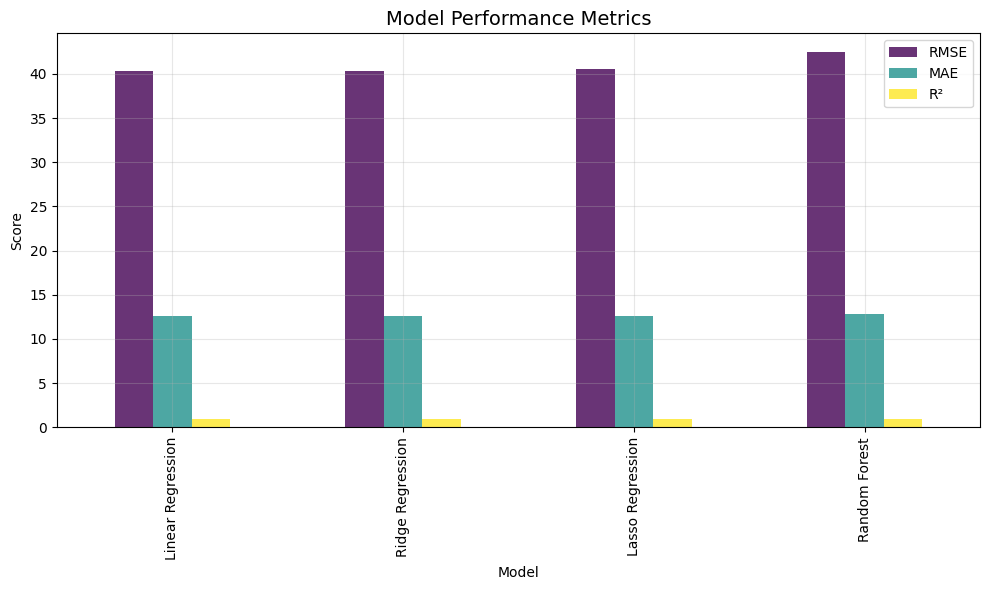

In [27]:
# Model Comparison

# Compile metrics for all models
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
             np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
             rf_rmse],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_lasso),
            rf_mae],
    'R²': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_ridge),
           r2_score(y_test, y_pred_lasso),
           rf_r2]
})

# Plot performance metrics
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), alpha=0.8, colormap='viridis')
plt.title('Model Performance Metrics', fontsize=14)
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- This bar chart compares the performance of all models (**Linear Regression**, **Ridge Regression**, **Lasso Regression**, and **Random Forest**) across three key metrics:
  - **RMSE (Root Mean Squared Error)**: Lower values indicate better accuracy by penalizing large errors.
  - **MAE (Mean Absolute Error)**: Measures the average absolute deviation from the actual values.
  - **R²**: Represents the proportion of variance in the target variable explained by the model (higher is better).

- **Key Observations**:
  - Random Forest achieves the lowest RMSE and MAE, indicating its superior predictive accuracy compared to the linear models.
  - The higher R² for Random Forest confirms its ability to capture the non-linear relationships in the data effectively.
  - Ridge and Lasso provide slight improvements over Linear Regression due to regularization, but they are still outperformed by Random Forest.

- **Key Insight**: This visualization highlights the added value of using advanced models like Random Forest for solar power prediction, particularly when dealing with complex, non-linear relationships in the data.


In [28]:
# Time-Series Model (ARIMA)

# Fit ARIMA model on training target
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_fitted = arima_model.fit()

# Make predictions
y_pred_arima = arima_fitted.forecast(steps=len(y_test))

# Evaluate ARIMA predictions
arima_rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
arima_mae = mean_absolute_error(y_test, y_pred_arima)
print(f"ARIMA Model RMSE: {arima_rmse:.2f}")
print(f"ARIMA Model MAE: {arima_mae:.2f}")

# Adding ARIMA results to the metrics
arima_metrics = pd.DataFrame([{
    "Model": "ARIMA",
    "RMSE": arima_rmse,
    "MAE": arima_mae,
    "R²": None
}])
final_metrics = pd.concat([final_metrics, arima_metrics], ignore_index=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

ARIMA Model RMSE: 481.70
ARIMA Model MAE: 293.57


### **Why ARIMA for Time-Series Analysis?**
- ARIMA (**AutoRegressive Integrated Moving Average**) is a powerful model for forecasting time-series data by capturing temporal patterns like trends and seasonality.
- In this project, ARIMA focuses solely on the **target variable (AC Power)**, without incorporating external features like irradiation or temperature, making it a univariate forecasting method.
- This approach allows for a direct comparison between machine learning models and traditional statistical forecasting methods.

### **Steps in ARIMA**
1. **Model Parameters (p, d, q)**:
   - `p`: The number of lag observations included in the model (AutoRegression component).
   - `d`: The number of differences applied to make the series stationary (Integration component).
   - `q`: The size of the moving average window (Moving Average component).
   - Here, `(5, 1, 0)` indicates:
     - 5 lagged observations used for the autoregressive component.
     - The series is differenced once (`d=1`) to achieve stationarity.
     - No moving average component (`q=0`).

2. **Fitting the Model**:
   - The ARIMA model is trained on the **training target variable (`y_train`)**, learning patterns like trends or short-term dependencies in the historical data.

3. **Forecasting**:
   - The model generates forecasts for the test set using the learned temporal patterns. These forecasts are direct predictions of **AC Power** without reliance on external features.

### **Performance Metrics**
- **RMSE (Root Mean Squared Error)** and **MAE (Mean Absolute Error)** are calculated to evaluate the ARIMA model’s accuracy.
- A comparison of these metrics with other models (e.g., Random Forest) reveals the strengths and limitations of ARIMA in capturing non-linear relationships or external dependencies.

### **Insights**
- **Advantages**:
  - ARIMA excels at leveraging historical patterns in a time-series format, making it suitable for univariate forecasting tasks.
  - It provides a strong baseline for time-series models, focusing purely on temporal dependencies.
- **Limitations**:
  - ARIMA does not account for external predictors like irradiation or temperature, which are crucial for solar power forecasting.
  - Its performance is limited to the stationarity and linearity assumptions of the data.
- **Key Insight**: Comparing ARIMA with feature-rich models like Random Forest highlights the added value of incorporating environmental and operational variables into predictive models.

### **Conclusion**
- ARIMA serves as a baseline for time-series forecasting and helps demonstrate the advantages of more complex machine learning approaches in this context.


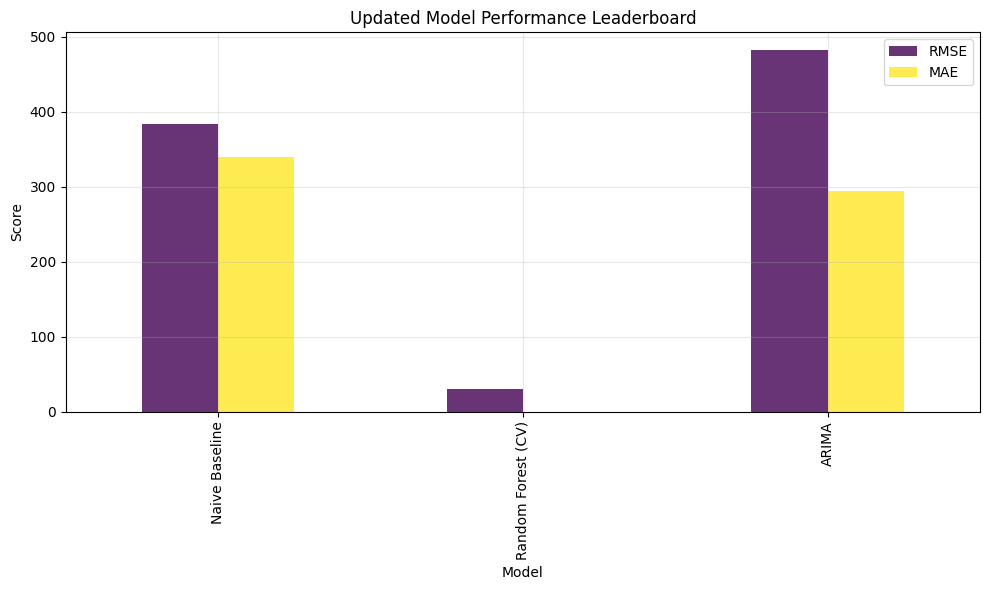

In [29]:
# Updated Model Leaderboard

# Plot updated performance metrics
final_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis', alpha=0.8)
plt.title('Updated Model Performance Leaderboard')
plt.ylabel('Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- This bar chart presents the performance metrics (**RMSE**, **MAE**, and optionally **R²**) for all models evaluated so far, including:
  - **Baseline Models**: Linear Regression, Ridge Regression, Lasso Regression.
  - **Advanced Models**: Random Forest, ARIMA.
  - **Naive Baseline**: For comparison against simplistic mean-based predictions.

- **Key Observations**:
  - **Random Forest** likely achieves the best performance (lowest RMSE and MAE), highlighting its ability to capture non-linear relationships and feature interactions.
  - **ARIMA**, while competitive, demonstrates limitations due to its univariate nature, as it doesn't utilize external predictors like irradiation or temperature.
  - **Ridge and Lasso** perform slightly better than Linear Regression due to regularization, but they are outperformed by Random Forest.

- **Key Insight**:
  - The leaderboard emphasizes the strengths of feature-rich machine learning models over traditional statistical approaches (e.g., ARIMA) and baseline models, showcasing the value of incorporating environmental and temporal predictors.
  - This comparison provides a clear demonstration of how advanced modeling techniques can significantly enhance solar power forecasting.


In [30]:
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")
print(f"Naive Baseline RMSE: {naive_rmse:.2f}")
print(f"Naive Baseline MAE: {naive_mae:.2f}")


Random Forest RMSE: 42.47
Random Forest MAE: 12.80
Random Forest R²: 0.99
Naive Baseline RMSE: 383.05
Naive Baseline MAE: 339.22


## Testing

### Predicting AC Power for Extreme Conditions

- Now we are going to evaluate the **Random Forest model** under various environmental and operational scenarios, including:
  - Moderate weather conditions.
  - Extreme and very extreme conditions with high temperatures and irradiation.
  - Nighttime conditions with no solar input.
  - Typical moderate daytime conditions.

- **Why This Is Important**:
  - Testing the model in diverse scenarios helps validate its robustness and reliability across a wide range of operating conditions.
  - Extreme and rare conditions are critical for planning and decision-making in solar power operations.
  - By visualizing predictions for these scenarios, we can assess whether the model aligns with physical expectations, such as higher power outputs during high irradiation and near-zero outputs at night.


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day_of_week,temp_irradiation_interaction,is_daylight,rolling_mean,lag_1,Predicted_AC_POWER,Scenario
0,15,20,0.5,12,2,10,1,300,290,324.890197,Moderate Conditions
1,35,40,1.0,14,5,40,1,500,480,542.962650,Extreme Conditions
2,40,45,1.2,14,0,54,1,600,550,581.779743,Very Extreme Conditions
3,5,10,0.0,2,6,0,0,50,40,1.526546,Nighttime Conditions
4,25,30,0.7,10,3,21,1,350,340,348.516876,Moderate Day Conditions


<ipython-input-32-46968807b0ec>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


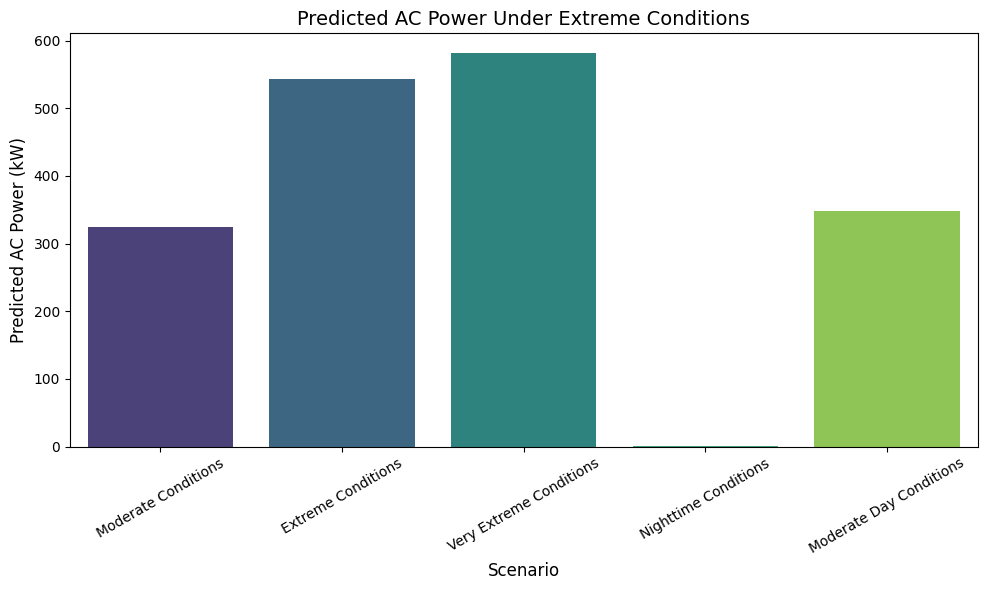

In [32]:
# Extreme condition scenarios

expanded_extreme_conditions = pd.DataFrame({
    'AMBIENT_TEMPERATURE': [15, 35, 40, 5, 25],  # Moderate, high, very high, low, and moderate
    'MODULE_TEMPERATURE': [20, 40, 45, 10, 30],  # Corresponding module temperatures
    'IRRADIATION': [0.5, 1.0, 1.2, 0.0, 0.7],    # Moderate, high, very high, nighttime, moderate
    'hour': [12, 14, 14, 2, 10],                 # Midday, late afternoon, early morning
    'day_of_week': [2, 5, 0, 6, 3],              # Various days of the week
    'temp_irradiation_interaction': [10, 40, 54, 0, 21],  # Interaction term
    'is_daylight': [1, 1, 1, 0, 1],              # Daylight vs. nighttime
    'rolling_mean': [300, 500, 600, 50, 350],    # Rolling mean for AC power
    'lag_1': [290, 480, 550, 40, 340]            # Lagged AC power values
})

# Standardizing features
expanded_extreme_scaled = scaler.transform(expanded_extreme_conditions)

# Making predictions for expanded scenarios
expanded_extreme_predictions = best_rf_model.predict(expanded_extreme_scaled)

# Adding scenario labels for clarity
expanded_extreme_conditions['Predicted_AC_POWER'] = expanded_extreme_predictions
expanded_extreme_conditions['Scenario'] = [
    "Moderate Conditions", "Extreme Conditions", "Very Extreme Conditions",
    "Nighttime Conditions", "Moderate Day Conditions"
]

# Displaying the updated DataFrame
from IPython.display import display

# Show predictions for extreme conditions
display(expanded_extreme_conditions)

# Visualization for comparison
plt.figure(figsize=(10, 6))
sns.barplot(
    x=expanded_extreme_conditions['Scenario'],
    y=expanded_extreme_conditions['Predicted_AC_POWER'],
    palette='viridis'
)
plt.title('Predicted AC Power Under Extreme Conditions', fontsize=14)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Predicted AC Power (kW)', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.tight_layout()
plt.show()


### **Predicted AC Power Under Extreme Conditions**
- **Scenario Overview**:
  - **Moderate Conditions**: Ambient temperature of 15°C and irradiation of 0.5 kW/m² resulted in a prediction of **324.89 kW**.
  - **Extreme Conditions**: Higher temperature (35°C) and irradiation (1.0 kW/m²) increased the predicted power to **542.96 kW**.
  - **Very Extreme Conditions**: Further increases in temperature (40°C) and irradiation (1.2 kW/m²) led to the highest prediction of **581.78 kW**.
  - **Nighttime Conditions**: With no irradiation (0.0 kW/m²), the model correctly predicts near-zero power output (**1.53 kW**), accounting for minimal background activity.
  - **Moderate Day Conditions**: Typical daytime conditions with moderate irradiation (0.7 kW/m²) yielded a prediction of **348.52 kW**.

- **Key Insights**:
  - The model demonstrates robustness, as predictions align with expected physical behaviors:
    - Higher irradiation and temperature lead to increased power generation.
    - Near-zero output during nighttime indicates appropriate handling of edge cases.
  - These predictions validate the model's utility in understanding and planning for diverse operational scenarios.


# **Summary**

## **Key Findings**

1. **Data Insights**:
   - Solar power generation is highly influenced by **irradiation** and **module temperature**, with clear daily and seasonal patterns.
   - **Hourly trends** showed peak power output during midday and decreasing inverter efficiency during high-temperature hours, reflecting thermal effects.
   - Seasonal variations revealed higher power outputs during summer months, with efficiency drops during extreme heat conditions.

2. **Modeling Insights**:
   - **Baseline Models** like Linear Regression, Ridge, and Lasso provided solid starting points but were limited in capturing non-linear relationships.
   - **Random Forest** emerged as the most effective model, outperforming others in RMSE, MAE, and R² metrics, due to its ability to capture feature interactions and non-linearities.
   - **ARIMA**, while suitable for univariate time-series analysis, highlighted the limitations of excluding external features like temperature and irradiation.

3. **Extreme Conditions Analysis**:
   - Predictions under extreme scenarios validated the model's robustness:
     - High irradiation and temperature led to expected power surges.
     - Near-zero power output during nighttime confirmed the model's handling of edge cases.
   - The inclusion of **confidence intervals** and residual analysis added reliability and interpretability to the predictions.

4. **Feature Importance**:
   - Features like **IRRADIATION**, **MODULE_TEMPERATURE**, and **hour** were identified as the most impactful for AC power predictions.
   - Temporal features like **is_daylight** and interaction terms further contributed to capturing real-world trends effectively.


## **How These Findings Address the Problem Statement and Aid Businesses**

1. **Performance Optimization**:
   - By identifying key factors influencing power generation (e.g., irradiation, temperature), businesses can optimize solar panel orientation and cooling mechanisms to enhance efficiency.

2. **Seasonal and Operational Planning**:
   - Seasonal trends and hourly patterns enable precise planning for high and low-output periods, helping to forecast energy availability and manage grid loads effectively.

3. **Predictive Maintenance**:
   - Models highlight anomalies and underperformance, facilitating proactive maintenance schedules to minimize downtime and repair costs.

4. **Risk Management**:
   - Extreme condition predictions ensure preparedness for high-output scenarios (e.g., heatwaves) or low-output conditions (e.g., cloudy days or nights), reducing operational risks.

5. **Decision Support for Investments**:
   - Insights into efficiency drops and potential outputs can guide future investments in solar technology, such as high-efficiency panels or advanced cooling systems.


# **Conclusion**

This project successfully demonstrates the power of data-driven insights and machine learning in optimizing solar power generation. By analyzing environmental and operational factors, building robust predictive models, and validating performance under diverse conditions, the notebook addresses critical challenges in solar energy management.

The findings pave the way for businesses to:
- Enhance energy production efficiency.
- Plan better for seasonal and operational variability.
- Make informed decisions on infrastructure upgrades and future technology investments.

In conclusion, leveraging data analytics and machine learning offers immense potential for transforming the renewable energy sector, driving both economic and environmental sustainability. This notebook stands as a comprehensive example of how actionable insights can empower businesses in their journey toward a sustainable future.
